Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. The team at FiveThirtyEight assembled a dataset using crowdsourced data from Guardian and census data. It contains information on each police killing in the US.

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. Let's see how the data looks like.


In [28]:
#read into pandas object and see first five rows
import pandas as pd
police_killings = pd.read_csv("Police killings/police_killings.csv",encoding="ISO-8859-1")
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


Since our dataset is very wide, it's useful to just see all columns for a single row of data.

In [29]:
print(police_killings.iloc[0,:]) 


name                             A'donte Washington
age                                              16
gender                                         Male
raceethnicity                                 Black
month                                      February
day                                              23
year                                           2015
streetaddress                          Clearview Ln
city                                      Millbrook
state                                            AL
latitude                                    32.5296
longitude                                  -86.3628
state_fp                                          1
county_fp                                        51
tract_ce                                      30902
geo_id                                   1051030902
county_id                                      1051
namelsad                        Census Tract 309.02
lawenforcementagency    Millbrook Police Department
cause       

Some of the interesting columns in the dataset are : 

<ul>
<li> <b>name</b> -- the name of the civilian. </li>
<li> <b>age</b> -- the age of the civilian.</li>
<li> <b>gender</b>  -- the gender of the civilian.</li>
<li> <b>raceethnicity</b>  -- the race and ethnicity of the civilian.</li>
<li> <b>month, day, and year</b>  -- when the shooting occurred.</li>
<li> <b>streetaddress, city, state</b>  -- where the shooting occurred.</li>
<li> <b>lawenforcementagency</b> -- the agency that was involved.
<li> <b>cause</b>   -- the cause of death.</li>
<li> <b>armed</b>  -- whether or not the civilian was armed.</li>
<li> <b>pop</b>  -- population of the census area where the incident occurred.</li>
<li> <b>county_income</b>  -- median household income in the county.</li>
</ul>

Let us explore the incidents by race.

In [30]:
police_killings["raceethnicity"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

<Container object of 6 artists>

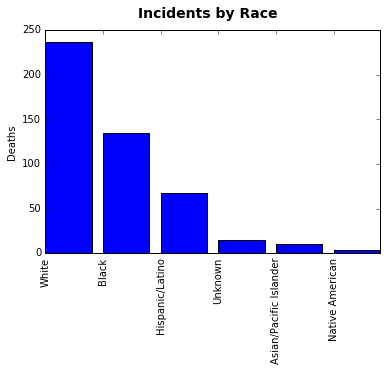

In [31]:
#Visualise the above incidents

%matplotlib inline
import matplotlib.pyplot as plt
numbers = police_killings["raceethnicity"].value_counts()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Deaths')
fig.suptitle('Incidents by Race', fontsize=14, fontweight='bold')
plt.xticks(range(6),numbers.index, rotation="vertical")

plt.bar(range(6), numbers)

Let's see how this breakdown compares to the population breakdown for USA. 


In [32]:
#Explore deaths as a percentage

percentage = numbers/sum(numbers) * 100
percentage


White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

People identified as Black are far more represented in these shootings as compared to their representation in the total population of the United States. 28% of the vicitims are black, and they only represent ~ 12% of the total US population.[(Source)](http://www.infoplease.com/ipa/A0762156.html)



The p_income column is an interesting column in our dataset and contains the median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

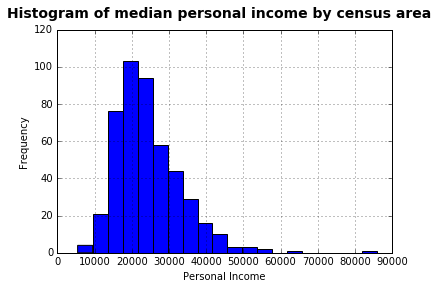

In [33]:
incomedf = police_killings[police_killings["p_income"]!='-']
income = incomedf["p_income"]
income.astype(float).hist(bins=20)
plt.suptitle("Histogram of median personal income by census area", fontsize=14, fontweight='bold')
plt.xlabel("Personal Income")
plt.ylabel("Frequency")

In [34]:
#Calculate the median income in the dataset
income.median()

22348.0

This does not say much other than confirming the idea that the shootings happen in less affluent areas of the United States, which have a median income of $22,348.

The per capita income for the overall population in 2008 was $26,984. ([source)](https://en.wikipedia.org/wiki/Personal_income_in_the_United_States)

Let's pull in some population data, to look at a population adjusted rate of shootings in a state. If more people were shot in Texas than in Rhode Island, it doesn't automatically mean that cops are more likely to shoot people in Texas. This is because Texas has a much larger population than Rhode Island.


In [35]:
state_pop = pd.read_csv("Police killings/state_population.csv")
state_pop.head(6)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3
5,40,4,9,6,California,39144818,30023902,76.7


The Census data was obtained from [here](https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html). Note that, the 'state' column in the police_killings dataset only has state abbreaviations. Whereas the 'NAME' column in this census data has the entire name of the state. We can work around this and use 'state_fp' column in police_killings to match "STATE" column in the census data. The below code does that.

Let's create a series called counts which has the occurences of each state_fp value in police_killings.

In [36]:

counts = police_killings["state_fp"].value_counts()
counts



6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
Name: state_fp, dtype: int64

Let's assign counts to a dataframe having two columns, the index from counts as a 'STATE'  column (since that is the state_fp value) and the value from counts as the 'shootings' column because it contains the values of the state_fp occurences.

In [37]:
states = pd.DataFrame({"STATE": counts.index, "shootings" : counts})
states


,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22
13,13,16
36,36,13
8,8,12
34,34,11
53,53,11


Now merge both the datasets (states and state_p) on the common 'STATE' column, since it is common to both tables. Just to recapitulate, states comes from counts, which is a series which comes from police_killings table. state_p is our census data.

In [38]:
states = states.merge(state_pop, on="STATE")

Next, we add new columns to show normalized population, divided by a million. And we add another column, rate, which is number of shootings divided by population in terms of millions to give police killings per one million people in each state.

In [39]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
states.sort("rate") #sorting by rate, states lowest to highest in police killings per million

/Users/Guneet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


We can see the number of incidents in each state now -

In [40]:
police_killings["state"].value_counts() #Number of incidents in each state

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
IL    11
LA    11
NJ    11
WA    11
NC    10
MO    10
OH    10
MD    10
VA     9
SC     9
MI     9
OR     8
IN     8
AL     8
PA     7
KY     7
TN     6
NE     6
MS     6
KS     6
MN     6
UT     5
WI     5
NM     5
MA     5
ID     4
HI     4
AR     4
NV     3
AK     2
WV     2
IA     2
DE     2
MT     2
ME     1
CT     1
NH     1
DC     1
WY     1
Name: state, dtype: int64

Here we create a new dataframe called g where '-' values are removed from certain columns and converted to floating types. Note that removing '-' or unknown columns does add bias to the data.

In [41]:
g = police_killings[(police_killings["share_white"]!='-') & (police_killings["share_black"]!='-') &
                    (police_killings["share_hispanic"]!='-')]

g["share_white"] = g["share_white"].astype(float)
g["share_black"] = g["share_black"].astype(float)
g["share_hispanic"] = g["share_hispanic"].astype(float)

/Users/Guneet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Guneet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Guneet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

With out merged table we can now look at states with highest and lowest rates, and some interesting columns which tell us more about them. Here are some inferences -

In [42]:

lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"] 
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = g[g["state"].isin(lowest_states)] #states from g where the state is in list of 10 states with lowest rates
hs = g[g["state"].isin(highest_states)] #states from g where the state in in list of 10 states with highest rates

In [43]:
#Looking at some interesting columns for these states like pop, county_income, share_white, share_black,
# share_hispanic

columnlist = ["pop","county_income","share_white","share_black","share_hispanic"]

ls[columnlist].mean() #mean values across states with lowest killing rates

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [44]:
hs[columnlist].mean() #mean values across states with highest killing rates

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

<h1> Inferences </h1> 
If we look at the data above we see that states with lower shooting rates tend to have a higher proportion of the population identifying as black. Also states with higher shooting rates show an increased proportion of people identifying as hispanic. States with higher shooting rates also have lower median county incomes as compared to states with lower shooting rates.

An interesting thing to note is that we are actually looking at columns that contain county-level data for where the shooting occurred which might differ from a state by state comparison of the columns. This may bias the data, and result in different observations.

<h1> Next Steps </h1>

For further analysis we could explore some of the columns that were not analysed for the above analysis and integrate more external data sources : 

<ul>
<li>Data.gov -  http://www.data.gov/</li>
<li>Socrata - https://opendata.socrata.com/ </li>
<li>Github - https://github.com/caesar0301/awesome-public-datasets </li>
<li>Census Data - https://www.census.gov </li>
</ul>

It'll be interesting to map out a state-level data in a choropleth map with matplotlib. A choropleth map is a kind of a thematic map that can be used to display data that varies across geographic regions. Data values are usually mapped to different color saturations for numerical variables or color hues for categorical variables. Different patterns can also be used, but that is not as common. Typical examples are maps that show election results.
 
It's useful to look more into the cause column as well, and see if there are any patterns. 
Looking more broadly at crime rates where the shootings occured could be a good point of investigation as well.